# Testing Kmeans on Dataframe2 with different cluster names after normalizing features to zero mean and unit STD

In [1]:
import numpy as np
import sklearn as skl
import pylab as plt

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#loading data
Data=np.loadtxt("dataframe2.dat")

In [3]:
Data.shape

(26139, 10)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler=StandardScaler()

In [5]:
Data_scaled=scaler.fit_transform(Data)

In [6]:
print Data_scaled[0]

[-0.17495022  0.62540042  0.46597945 -0.52498344  0.4370654   0.7623944
  0.38637627  0.22531067 -0.10818111  1.3184178 ]


In [14]:
sanity_check=scaler.inverse_transform(Data_scaled)

In [19]:
Data[3],sanity_check[3]

(array([  53.  ,   26.  ,    8.  ,    3.  ,    1.  ,    9.  ,    2.66,
           1.83,    3.44,  173.  ]),
 array([  53.  ,   26.  ,    8.  ,    3.  ,    1.  ,    9.  ,    2.66,
           1.83,    3.44,  173.  ]))

In [7]:
from sklearn.cluster import KMeans

In [8]:
clust=KMeans(n_clusters=10)

In [9]:
clusters=clust.fit_predict(Data_scaled)

In [10]:
cluster_freq=np.zeros(10,dtype=float)
for i in clusters:
    cluster_freq[i]+=1
print map(int,cluster_freq)

[2783, 705, 3180, 2962, 610, 4559, 637, 3909, 2968, 3826]


In [18]:
clust_4=[data[0:9] for i,data in zip(clusters,Data) if i==4]
for j in clust_4:
    p,q,r=j[0:3]
    l,m,n=j[3:6]

In [19]:
import pymatgen as mg

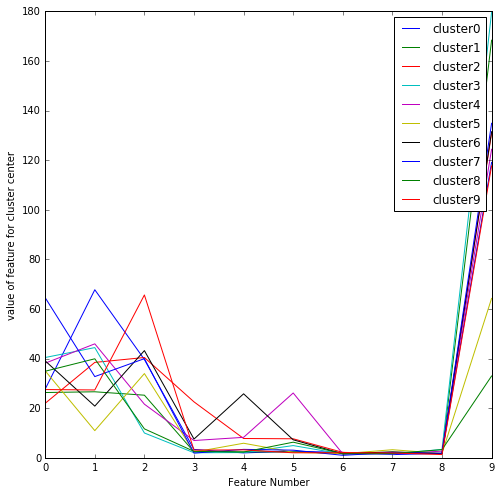

In [26]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.plot(np.arange(len(Data_scaled[0])),scaler.inverse_transform(clust.cluster_centers_[i]),label="cluster"+str(i))
plt.xlabel("Feature Number")
plt.ylabel("value of feature for cluster center")
plt.legend()

In [29]:
scaled_centers=scaler.inverse_transform(clust.cluster_centers_)

In [30]:
print scaled_centers[:,9]

[ 119.12629491  168.37893462  130.91629297  179.63277693  124.39316239
   64.27140784  131.49432739  134.88632833   32.97860109  117.71662304]


# Testing inertia for different number of clusters

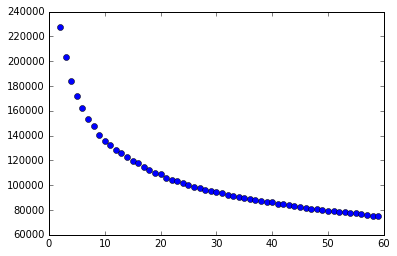

In [33]:
clust_num_max=60
inertia=np.zeros(clust_num_max-2)
for nclt in range(2,clust_num_max):
    clust2=KMeans(n_clusters=nclt,random_state=42)
    clusters2=clust2.fit_predict(Data_scaled)
    inertia[nclt-2]=clust2.inertia_
plt.plot(np.arange(2,clust_num_max),inertia,'o')

[ -0.33289683  12.58831962]
[[  6.56547579e-07  -2.08888342e-06]
 [ -2.08888342e-06   7.06491927e-06]]


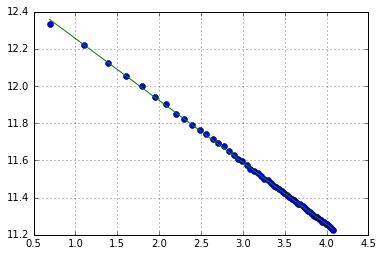

In [58]:
plt.plot(np.log(np.arange(2,clust_num_max)),np.log(inertia),'o')  
plt.grid()
(p,V)=np.polyfit(np.log(np.arange(2,clust_num_max)),np.log(inertia),1,cov=True)
log_x=np.log(np.arange(2,clust_num_max))
log_y=p[1]+p[0]*log_x
print p
print V
plt.plot(np.log(np.arange(2,clust_num_max)),log_y,'-')

3.02437814261


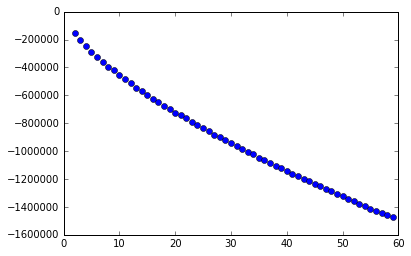

In [63]:
inertia_scaled=np.zeros(len(inertia))
for i in range(2,clust_num_max):
    inertia_scaled[i-2]=inertia[i-2]*(i*p[0])
plt.plot(np.arange(2,clust_num_max),inertia_scaled,'o') 
print(inertia[0]/inertia[-1])